GP_regression.,value,constraints,priors
std_periodic.variance,1.0,+ve,
std_periodic.period,0.022727272727272728,+ve,
std_periodic.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


-80.13464259303747

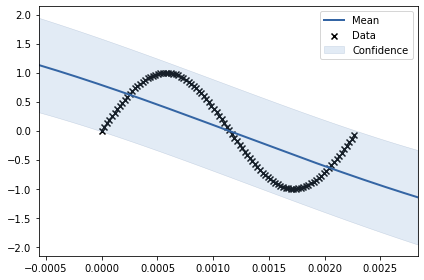

In [50]:

import numpy as np
import GPy
import matplotlib as plt
from gaussian_processes_util import plot_gp
import scipy.io.wavfile as wav

noise = 0.4

# Option 1: create own training data
# X_train = np.arange(-3, 4, 1).reshape(-1, 1)
# Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Option 2

wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/Sine.wav'
sample_rate, data = wav.read(wav_file)

# Truncate data to make manageable
Y_train = data[:100].reshape(-1, 1)  

# Find time time length of truncated data
time_length = Y_train.shape[0] / sample_rate

# Plot times
X_train = np.linspace(0., time_length, Y_train.shape[0]).reshape(-1, 1)


rbf = GPy.kern.StdPeriodic(input_dim=1, variance=1.0, lengthscale=1.0, period=1/44)
gpr = GPy.models.GPRegression(X_train, Y_train, rbf)

# Fix the noise variance to known value 
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()


# Display optimized parameter values
display(gpr)

gpr.plot()
gpr.log_likelihood()


GP_regression.,value,constraints,priors
std_periodic.variance,0.6358643709767299,+ve,
std_periodic.period,1.3806425083157885,+ve,
std_periodic.lengthscale,0.0013191226922352676,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


-12.673540814869202

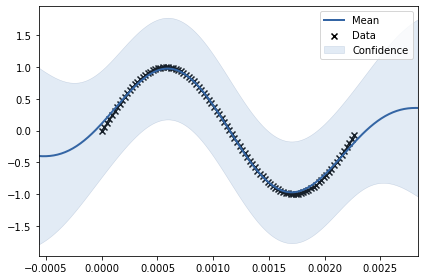

In [46]:

# Run optimization
gpr.optimize()

# Display optimized parameter values
display(gpr)

gpr.plot()

gpr.log_likelihood()